In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('Mortality_Rate_Data.csv')

In [3]:
data_tx = data[data["State"] == 'Texas']

### plotting for texas

In [4]:
texas_wide = data_tx.pivot(index="Year", columns="CTYNAME", values="Mortality_Rate")

<Axes: xlabel='Year'>

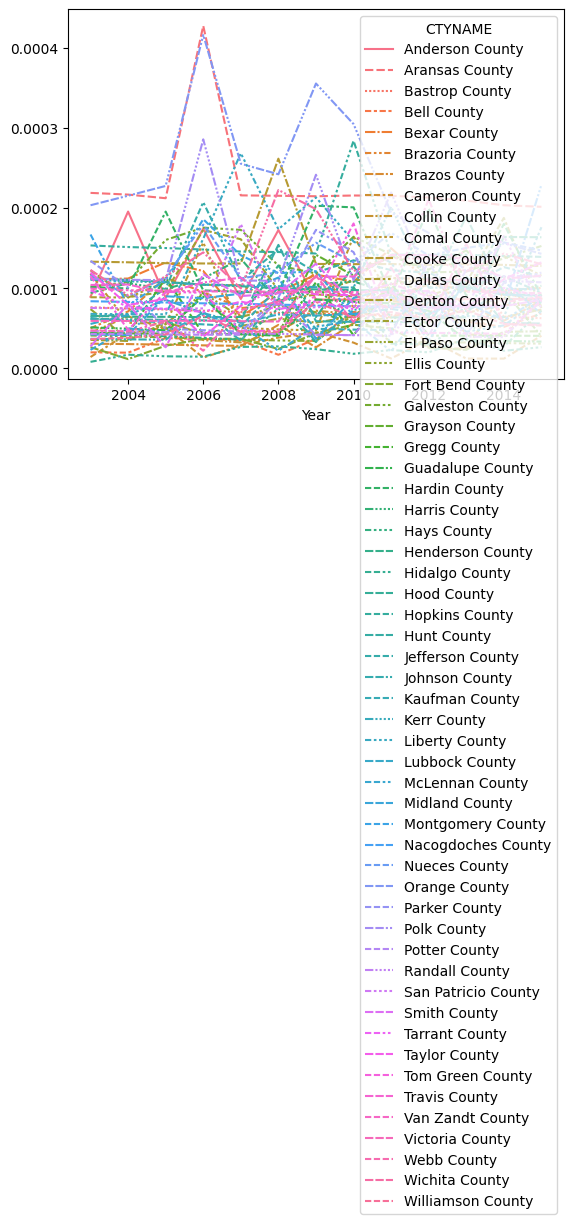

In [5]:
sns.lineplot(data=texas_wide)

<Axes: xlabel='Year', ylabel='Mortality_Rate'>

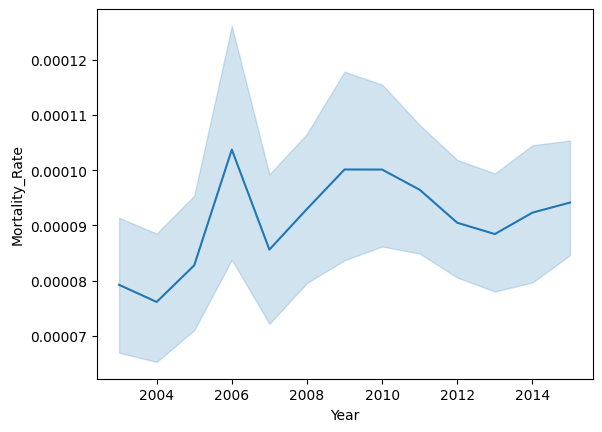

In [6]:
sns.lineplot(data=data_tx, x="Year", y="Mortality_Rate")


### Pre post analysis for Florida 

In [14]:
data_fl = data[data["State"] == 'Florida']

##### policy change in 2010

### Aggregate at state level - single point for each year

In [15]:
data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_27679/2982374715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


In [16]:
data_fl = data_fl[['State','Year','Agg']].drop_duplicates() 

In [17]:
fl_pre = data_fl[data_fl['Year'] < 2010]

In [18]:
fl_post = data_fl[data_fl['Year'] >= 2010]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

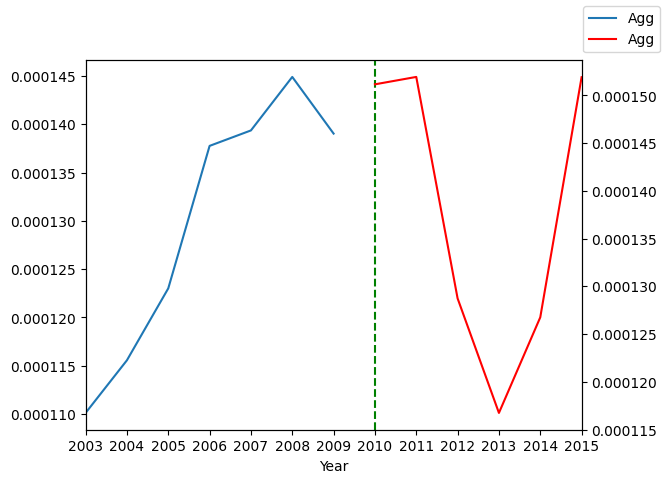

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have already defined fl_pre and fl_post DataFrames

# Plotting the first set of data
ax = fl_pre.plot(x="Year", y="Agg", legend=False)
ax2 = ax.twinx()
fl_post.plot(x="Year", y="Agg", ax=ax2, legend=False, color="r")

# Adding a vertical line at year 2010
ax.axvline(x=2010, color='g', linestyle='--') 

min_year = min(fl_pre['Year'].min(), fl_post['Year'].min())
max_year = max(fl_pre['Year'].max(), fl_post['Year'].max())
ax.set_xlim(min_year, max_year)

# Set x-axis ticks to display every year
ax.set_xticks(range(int(min_year), int(max_year) + 1))  # Set ticks for every year

ax.figure.legend()

# Show the plot
plt.show()


/tmp/ipykernel_27679/1601134542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pre['Data'] = 'Pre'
/tmp/ipykernel_27679/1601134542.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_post['Data'] = 'Post'


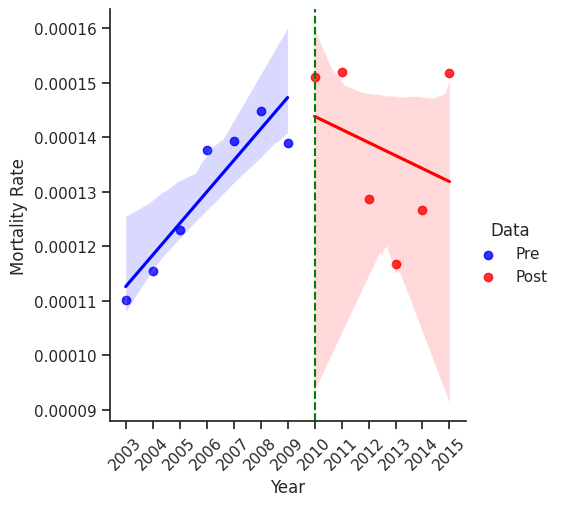

In [30]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
fl_pre['Data'] = 'Pre'
fl_post['Data'] = 'Post'
combined_data = pd.concat([fl_pre, fl_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2010, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")

# Show the plot
plt.show()


##### creating for washington

In [31]:
data_wa = data[data["State"] == 'Washington']
data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')
data_wa = data_wa[['State','Year','Agg']].drop_duplicates() 
wa_pre = data_wa[data_wa['Year'] < 2012]
wa_post = data_wa[data_wa['Year'] >= 2012]

/tmp/ipykernel_27679/2511489478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_27679/1635361992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_pre['Data'] = 'Pre'
/tmp/ipykernel_27679/1635361992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_post['Data'] = 'Post'


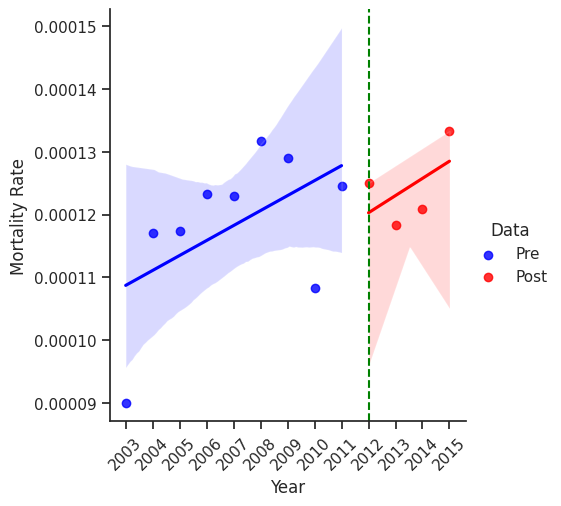

In [33]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
wa_pre['Data'] = 'Pre'
wa_post['Data'] = 'Post'
combined_data = pd.concat([wa_pre, wa_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2012, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")

# Show the plot
plt.show()

## Opioid per capita